In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression

In [3]:
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [5]:
#DATA PREPROCESSING : we try to limit the number of undefined values appearing in the datas 
 
#vire les features pas importantes ou celles très corrélées entre elles
columns_bad_correl = [30, 29, 28, 27, 25, 24, 7, 6]
correl_ = np.delete(tX, columns_bad_correl, axis=1)

#vire les colonnes avec trop de undefined values
bounds = [0.2, 0.5]
tX_after, indices = treat_undefined_values(bounds, correl_)

/home/hmonnet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """


In [6]:
#MODEL BUILDING
tx, mean, std = standardize(tX_after,0)
y, tx = build_model_data(tx,y)

In [7]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 20)

## Ridge regression using normal equations:

### Linear regression

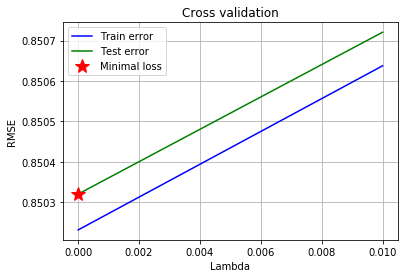

 Best value of lambda = 6.866488450043588e-13 
 Loss = 0.8503204462053058 
 Weights = [-0.31466146  0.09824137 -0.30061404 -0.07495308 -0.18540292 -0.03174591
 -0.0373482  -0.11828401  0.14574701  0.18109463 -0.00055528 -0.00234169
  0.21678777 -0.0008045   0.00203775  0.18239603  0.0010438  -0.08514064
  0.03652646  0.01581   ]


In [70]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import *

w_initial = np.random.rand(num_features)
lambdas = np.logspace(-500, -2, 50)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]


plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

### Polynomial regression

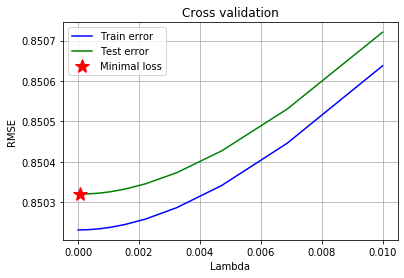

Degree=1 Best value of lambda = 5.179474679231202e-05 
 Loss = 0.8503204233417874 
 Weights = [-0.31462886  0.09821315 -0.30045646 -0.07486461 -0.18502232 -0.03175541
 -0.03728521 -0.11824882  0.1456988   0.18099734 -0.00055571 -0.00234229
  0.21656229 -0.00080444  0.00203802  0.18214682  0.00104457 -0.08513403
  0.03647365  0.01577852]


In [ ]:
from cross_validation import cross_validation
from cost import compute_loss_rmse

w_initial = np.random.rand(num_features)
degrees = 8
lambdas = np.logspace(-10, -2, 50)
k_fold = 4
seed = 6

Lambdas_star = []
Loss = []

for indices, degree in enumerate(range(1, degrees+1)):
    
    # prepare storage of the mean of the weights and rmse for train and test data
    #ws = np.zeros((num_features*degree, len(lambdas)))
    #rmse_train = []
    rmse_test = []

    for ind, lambda_ in enumerate(lambdas):
        # prepare storage of weights and rmse for train and test data for each fold
        #ws_tmp = np.zeros((num_features*degree, k_fold))
        #rmse_tr = []
        rmse_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            tx_tr, y_train, tx_te, y_test = cross_validation(y, tx, k, k_fold, seed)
            #form data with polynomial degree
            tx_train = build_poly_all_features(tx_tr, degree)
            tx_test = build_poly_all_features(tx_te, degree)
            #ridge regression
            w,_ = ridge_regression(y_train, tx_train, lambda_)
            # store weights and rmse for train and test data for each fold
            #ws_tmp[:, i] = w
            #rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
            rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
        # store the mean of the weights and rmse for train and test data
        #ws[:, ind] = np.mean(ws_tmp, 1)
        #rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))

    loss = np.amin(rmse_test)
    #weights = ws[:, np.argmin(rmse_test)]
    lambda_star = lambdas[np.argmin(rmse_test)]

    #plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
    #print("Degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
        #d=degree, g=lambda_star, l=loss, we = weights))
    
    Lambdas_star.append(lambda_star)
    Loss.append(loss)

degree_star =  degrees[np.argmin(Loss)]      
Loss_star = np.amin(Loss)
Lambda_star = Lambdas_star[np.argmin(Loss)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, l=Loss_star, we = Weights_star))

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test = np.delete(tX_test, indices, axis=1)
_, tx_test = build_model_data(tX_test,ytest)

In [28]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)